# DATA VISUALIZATION - END COURSE PROJECT 

<img src='photos/UEFA.jpg'>

For this project we'll be looking at the UEFA Champions League 2021/22 Season and also enrich it by looking at Quarter Finals since the Year 1980.

fgfgfgfgfg

In [3]:
#Importing Python Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
#Loading the csv Files
attacking_df = pd.read_csv('attacking.csv')
attempts_df = pd.read_csv('attempts.csv')
defending_df = pd.read_csv('defending.csv')
disciplinary_df = pd.read_csv('disciplinary.csv')
distribution_df = pd.read_csv('distributon.csv')
goalkeeping_df = pd.read_csv('goalkeeping.csv')
goals_df = pd.read_csv('goals.csv')
stats_df = pd.read_csv('key_stats.csv')

For this project, we won't be merging the dataframes since they all consist of different players which will result into a lot of null value rows and columns

# Attacking DataFrame

<img src='photos/Attacking-df.jpg'>

In [6]:
#Having a look at the dataframe
attacking_df

,serial,player_name,club,position,assists,corner_taken,offsides,dribbles,match_played
0,1,Bruno Fernandes,Man. United,Midfielder,7,10,2,7,7
1,2,Vinícius Júnior,Real Madrid,Forward,6,3,4,83,13
2,2,Sané,Bayern,Midfielder,6,3,3,32,10
3,4,Antony,Ajax,Forward,5,3,4,28,7
4,5,Alexander-Arnold,Liverpool,Defender,4,36,0,9,9
...,...,...,...,...,...,...,...,...,...
171,64,Tolisso,Bayern,Midfielder,1,0,0,0,4
172,64,Schuurs,Ajax,Defender,1,0,0,0,3
173,64,Kryvtsov,Shakhtar Donetsk,Defender,1,0,0,0,3
174,64,Stanišić,Bayern,Defender,1,0,0,0,2


### Inspecting the Dataframe, Any null values? Any missing data?

In [7]:
#Checking for Null values or missing data
print("Sum of Null values\n")
print(attacking_df.isna().sum())
print("\n")

#Info on Dataset
print("Info on Dataset\n")
print(attacking_df.info())
print("\n")

#Duplicated Elements
print(f"Duplicated Elements: {attacking_df.duplicated().sum()}")

Sum of Null values

serial          0
player_name     0
club            0
position        0
assists         0
corner_taken    0
offsides        0
dribbles        0
match_played    0
dtype: int64


Info on Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   serial        176 non-null    int64 
 1   player_name   176 non-null    object
 2   club          176 non-null    object
 3   position      176 non-null    object
 4   assists       176 non-null    int64 
 5   corner_taken  176 non-null    int64 
 6   offsides      176 non-null    int64 
 7   dribbles      176 non-null    int64 
 8   match_played  176 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.5+ KB
None


Duplicated Elements: 0


Our dataframe has no issues

In [8]:
#Checking for the player with the most assists
attacking_df[attacking_df['assists']==attacking_df['assists'].max()]

,serial,player_name,club,position,assists,corner_taken,offsides,dribbles,match_played
0,1,Bruno Fernandes,Man. United,Midfielder,7,10,2,7,7


Bruno Fernades was the player with the most assists

In [9]:
#Checking for the player with the most dribbles
attacking_df[attacking_df['dribbles']==attacking_df['dribbles'].max()]

,serial,player_name,club,position,assists,corner_taken,offsides,dribbles,match_played
1,2,Vinícius Júnior,Real Madrid,Forward,6,3,4,83,13


Vinicius Junior was the player with the most dribbles

### Creating a Column 'Points' that combines dribbles and assists of each players as we'll focus on these two more when looking at attacking attributes

In [10]:
#Adding the two columns, appending the result to a new column
attacking_df['points'] = attacking_df['dribbles'] + attacking_df['assists']
attacking_df

,serial,player_name,club,position,assists,corner_taken,offsides,dribbles,match_played,points
0,1,Bruno Fernandes,Man. United,Midfielder,7,10,2,7,7,14
1,2,Vinícius Júnior,Real Madrid,Forward,6,3,4,83,13,89
2,2,Sané,Bayern,Midfielder,6,3,3,32,10,38
3,4,Antony,Ajax,Forward,5,3,4,28,7,33
4,5,Alexander-Arnold,Liverpool,Defender,4,36,0,9,9,13
...,...,...,...,...,...,...,...,...,...,...
171,64,Tolisso,Bayern,Midfielder,1,0,0,0,4,1
172,64,Schuurs,Ajax,Defender,1,0,0,0,3,1
173,64,Kryvtsov,Shakhtar Donetsk,Defender,1,0,0,0,3,1
174,64,Stanišić,Bayern,Defender,1,0,0,0,2,1


### Let's take a look at what Playing Position Dominated Attacking Points

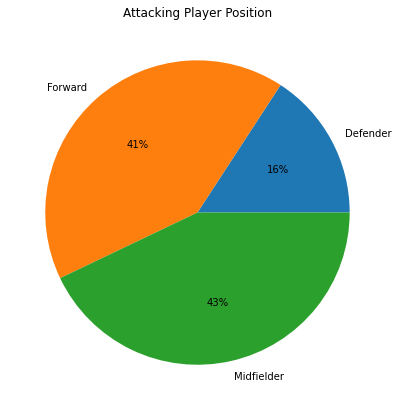

In [11]:
#Creating a new Dataframe
attacking_positions1 = attacking_df.groupby(['position'],as_index=False)[['points']].sum()
attacking_positions1.drop(index=2,axis=0,inplace=True)

#Creating the plot
plt.figure(figsize=(10,7))
plt.pie(attacking_positions1['points'],labels=attacking_positions1['position'],autopct="%1.f%%")

#Setting the title
plt.title('Attacking Player Position');

### Let's take a look at the Top Attacking clubs in the Champions League

In [86]:
#Grouping clubs by total number of attacking points
attacking_points = attacking_df.groupby(['club'],as_index=False)['points'].sum()
#Arranging the dataframe according to points in descending order
attacking_points = attacking_points.sort_values(by='points',ascending=False).style.background_gradient(cmap='Reds')
attacking_points

,club,points
15,Liverpool,190
22,Real Madrid,186
4,Bayern,169
17,Man. City,167
0,Ajax,113
7,Chelsea,94
28,Villarreal,90
20,Paris,80
1,Atalanta,68
5,Benfica,61


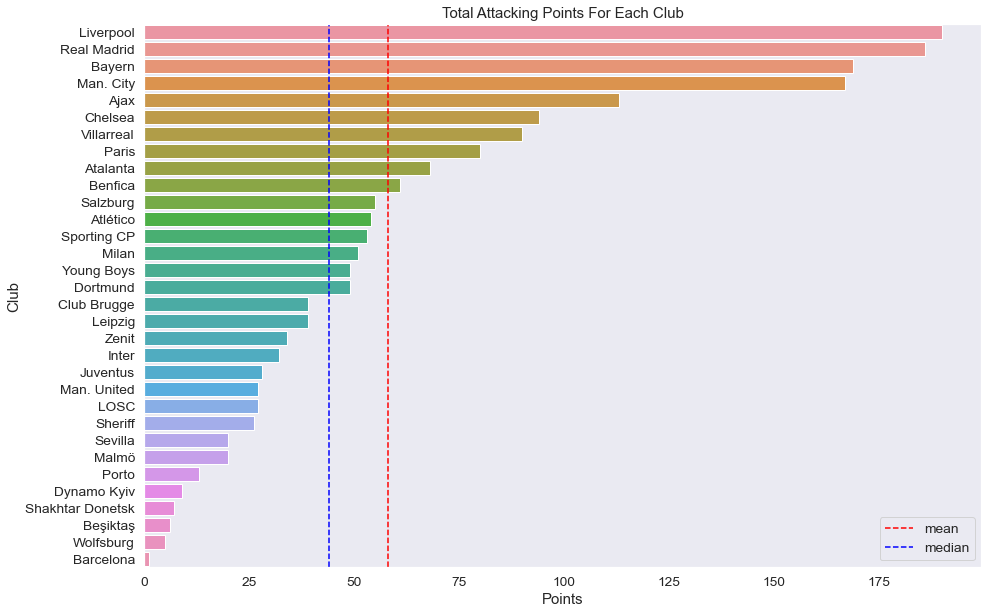

In [13]:
#Creating the plot
plt.figure(figsize=(15,10))
sns.set_style('dark')
sns.set_context("notebook",font_scale=1.25)
sns.barplot(y='club', x='points', data=attacking_points)

#Displaying Mean and median
mean = int(np.mean(attacking_points['points']))
median = int(np.median(attacking_points['points']))
plt.axvline(x=mean, ls='--',color='red',label='mean')
plt.axvline(x=median, ls='--',color='blue',label='median')


#Setting title and labels
plt.title('Total Attacking Points For Each Club')
plt.xlabel('Points')
plt.ylabel('Club')
plt.legend();

From the above Plot we see that Liverpool had the highest attacking points.

### A look at the players attacking perfomance

In [88]:
#Grouping the data
attacking_players = attacking_df.groupby(['player_name'],as_index=False)['points'].sum()
#Sorting values
attacking_players = attacking_players.sort_values(by='points',ascending=False)
#Having a look
attacking_players

,player_name,points
168,Vinícius Júnior,89
31,Coman,62
145,Salah,51
103,Mbappé,47
95,Luis Díaz,43
...,...,...
152,Stanišić,1
148,Schuurs,1
20,Bernardo,1
136,Rakitić,1


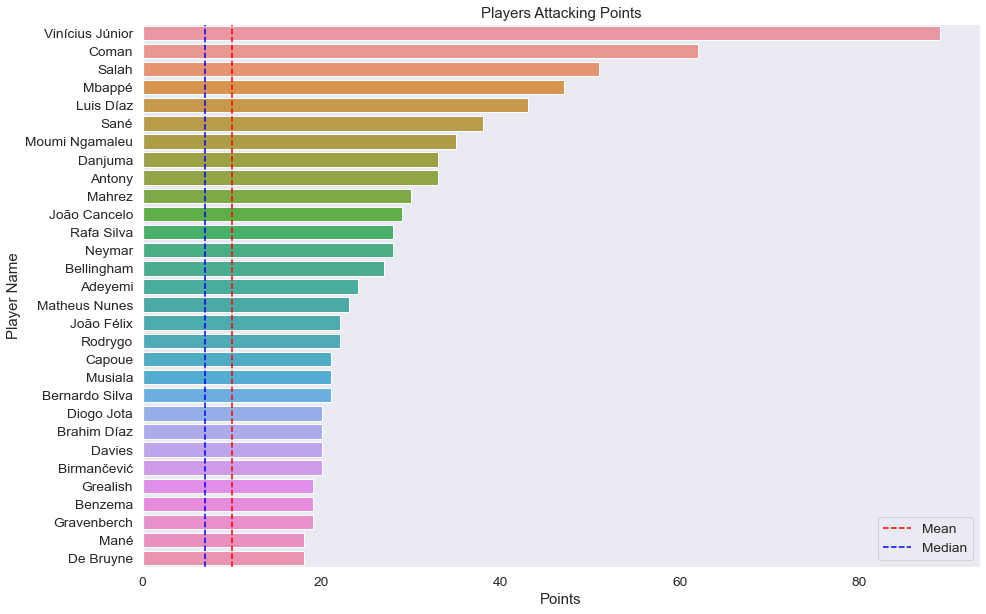

In [15]:
#Creating the plot
plt.figure(figsize=(15,10))
sns.barplot(x='points', y='player_name', data=attacking_players.head(30))

#Displaying Mean and median
mean2 = int(np.mean(attacking_players['points']))
median2 = int(np.median(attacking_players['points']))
plt.axvline(x=mean2, color='red', ls='--',label='Mean')
plt.axvline(x=median2, color='blue',ls='--', label='Median')

#Setting title and labels
plt.title('Players Attacking Points')
plt.xlabel('Points')
plt.ylabel('Player Name')
plt.legend();

From the Above plot we see that Vinicious Junior had the most attacking points inclusive of both dribbles and assists.

### Let's take a look at Attacking Points on Player Positions

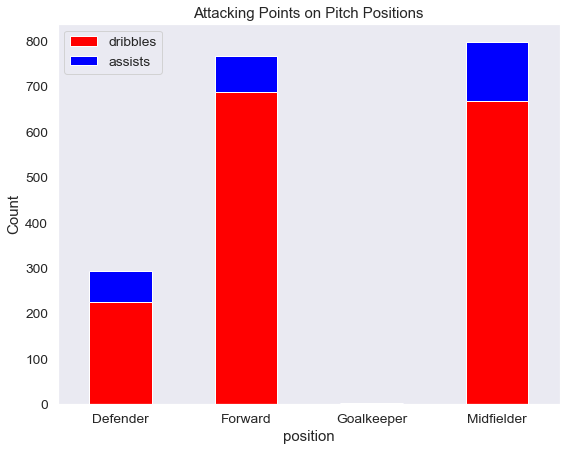

In [16]:
#Creating the new dataframe
attacking_positions = attacking_df.groupby(['position'])[['dribbles','assists']].sum()
#Creating the plot
plt.figure(figsize=(9,7))
attacking_positions.plot(kind='bar', stacked=True, color=['red','blue'],ax=plt.gca())
#Setting xticks,labels and title
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title('Attacking Points on Pitch Positions');

From the above plot,we see that Midfielders had the highest attacking points followed closely behind by forwards

# Attempts DataFrame

<img src='photos/Attempts2.jpg'>

In [18]:
#Taking a look
attempts_df

,serial,player_name,club,position,total_attempts,on_target,off_target,blocked,match_played
0,1,Benzema,Real Madrid,Forward,45,23,13,9,12
1,2,Salah,Liverpool,Forward,42,22,11,9,13
2,3,Mahrez,Man. City,Midfielder,37,18,8,11,12
3,4,Sané,Bayern,Midfielder,33,13,12,8,10
4,5,Lewandowski,Bayern,Forward,31,19,8,4,10
...,...,...,...,...,...,...,...,...,...
541,440,Dina Ebimbe,Paris,Midfielder,1,0,0,1,1
542,440,N'Koudou,Beşiktaş,Midfielder,1,0,0,1,1
543,440,Izquierdo,Club Brugge,Forward,1,0,0,1,1
544,440,Radonjić,Benfica,Forward,1,0,0,1,1


In [19]:
#Checking for missing values
print("Sum of Null values\n")
print(attempts_df.isna().sum())
print("\n")

#Info on Dataframe
print("Info on Attempts Dataframe\n")
print(attempts_df.info())
print("\n")

#Checking for duplicated elements
print(f"Duplicated Elements: {attempts_df.duplicated().sum()}")

Sum of Null values

serial            0
player_name       0
club              0
position          0
total_attempts    0
on_target         0
off_target        0
blocked           0
match_played      0
dtype: int64


Info on Attempts Dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   serial          546 non-null    int64 
 1   player_name     546 non-null    object
 2   club            546 non-null    object
 3   position        546 non-null    object
 4   total_attempts  546 non-null    int64 
 5   on_target       546 non-null    int64 
 6   off_target      546 non-null    int64 
 7   blocked         546 non-null    int64 
 8   match_played    546 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 38.5+ KB
None


Duplicated Elements: 0


The above statistics display shows that the there are no null values in our dataset

### Let's take a look at the Attempts of Clubs in the UEFA Champion's League

In [89]:
#Grouping the Data Set
attempts_clubs = attempts_df.groupby(['club'])[['on_target','off_target','blocked','total_attempts']].sum().sort_values(by='total_attempts',ascending=False).style.background_gradient(cmap='Oranges')
#View the Dataframe
attempts_clubs

,on_target,off_target,blocked,total_attempts
club,,,,
Liverpool,74,73,56,203
Man. City,68,59,66,193
Bayern,70,76,46,192
Real Madrid,69,62,48,179
Chelsea,57,63,47,167
Inter,40,58,35,133
Ajax,52,52,27,131
Villarreal,45,45,25,115
Juventus,37,54,14,105


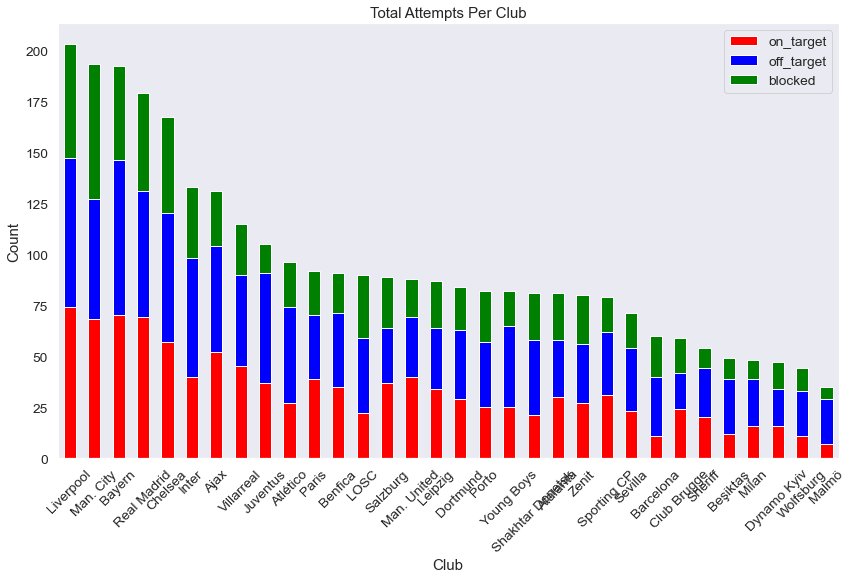

In [21]:
#Dropping the 'total attempts' column to avoid plotting it
attempts_clubs.drop(['total_attempts'],axis=1,inplace=True)

#Creating the plot
plt.figure(figsize=(14,8))
attempts_clubs.plot(kind='bar',stacked=True, color=['red','blue','green'],ax=plt.gca())

#Setting xticks,title and labels
plt.xticks(rotation=45)
plt.title('Total Attempts Per Club')
plt.xlabel('Club')
plt.ylabel('Count');

From the above Plot, we see that Liverpool once again was the team with the highest Attempts followed closely by Manchester City

### Let's take a look at the Players with the highest Attempts

In [22]:
#Grouping the Dataset
attempts_players = attempts_df.groupby(['player_name'])[['on_target','off_target','blocked','total_attempts']].sum().sort_values(by='total_attempts',ascending=False)
#Viewing the Data
attempts_players.head(10)

,on_target,off_target,blocked,total_attempts
player_name,,,,
Benzema,23,13,9,45
Salah,22,11,9,42
Mahrez,18,8,11,37
Martínez,9,14,11,34
Sané,13,12,8,33
Lewandowski,19,8,4,31
Luis Díaz,11,7,11,29
Mbappé,16,6,5,27
Vinícius Júnior,8,10,9,27


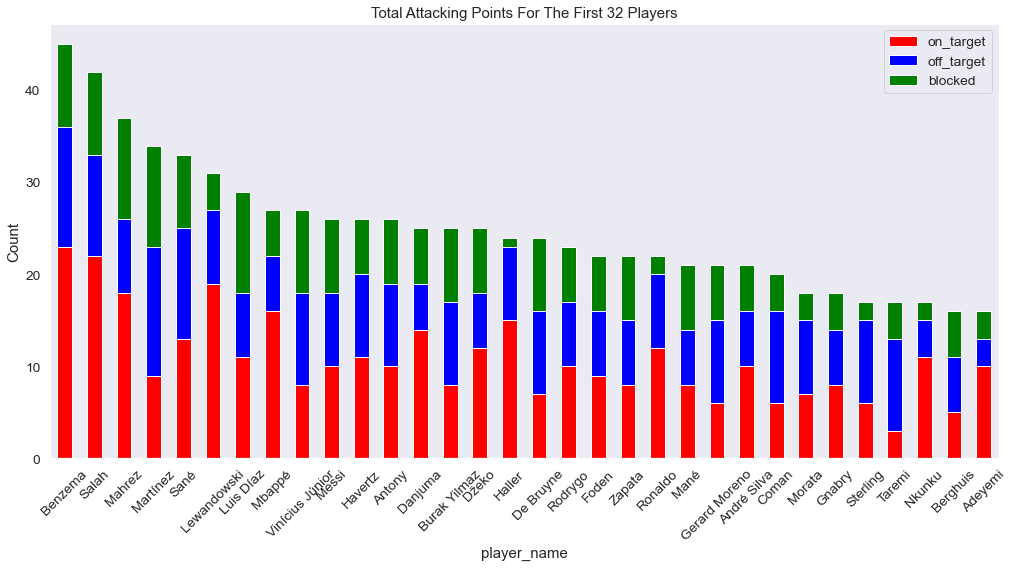

In [23]:
#Dropping the 'total attempts' column to avoid Plotting it
attempts_players.drop(['total_attempts'],axis=1,inplace=True)

#Creating the plot
plt.figure(figsize=(17,8))
attempts_players.head(32).plot(kind='bar',stacked=True,color=['red','blue','green'],ax=plt.gca());

#Setting the xticks, labels and title
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.title('Total Attacking Points For The First 32 Players');

From the above Plot we see that Benzema was the Player with the highest number of Attempts in te UEFA Champions League

### Let's take a look at work rate, Total Attempts vs Matches Played for each field position.(Which position had the highest work rate?)

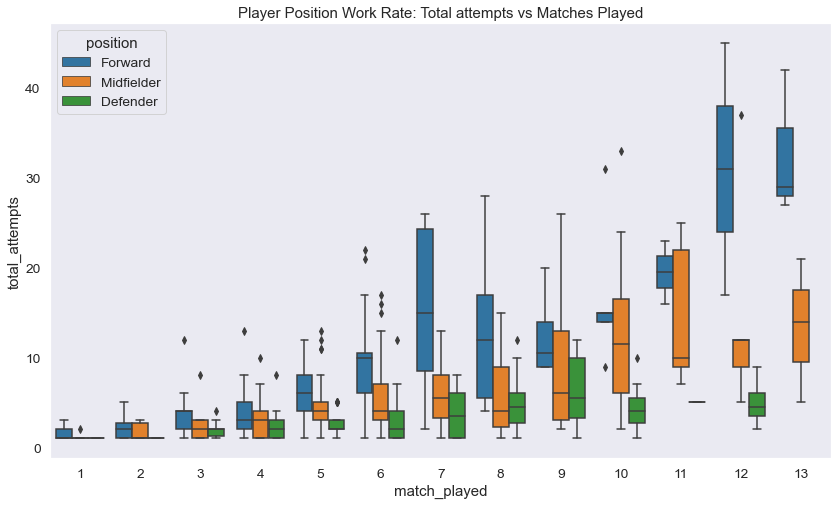

In [24]:
#Creating the Plot
plt.figure(figsize=(14,8))
sns.boxplot(x='match_played', y='total_attempts',hue='position',data=attempts_df)

#Setting the title
plt.title('Player Position Work Rate: Total attempts vs Matches Played');

It is evident that Forwards had the most attempts

# Defending Dataframe

<img src='photos/Defending-df.jpg'>

In [26]:
#Checking out the df
defending_df

,serial,player_name,club,position,balls_recoverd,tackles,t_won,t_lost,clearance_attempted,match_played
0,1,Casemiro,Real Madrid,Midfielder,76,31,13,18,19,11
1,1,Éder Militão,Real Madrid,Defender,76,19,6,13,32,12
2,1,Reinildo,Atlético,Defender,76,13,6,7,20,10
3,4,Fabinho,Liverpool,Midfielder,74,23,9,14,8,13
4,5,Albiol,Villarreal,Defender,73,9,6,3,62,12
...,...,...,...,...,...,...,...,...,...,...
622,578,Maier,Young Boys,Midfielder,1,0,0,0,0,1
623,578,Zhegrova,LOSC,Midfielder,1,0,0,0,0,1
624,578,Zesiger,Young Boys,Defender,1,0,0,0,0,1
625,578,Zakaria,Juventus,Midfielder,1,0,0,0,0,1


### Inspecting the Data Frame, Any missing values?, Any duplicated values?

In [27]:
#Null/missing values
print("Sum of Null values\n")
print(defending_df.isna().sum())
print("\n")

#Info on Dataset
print("Info on Dataset\n")
print(defending_df.info())
print("\n")

#Duplicated values
print(f"Duplicated Elements: {defending_df.duplicated().sum()}")

Sum of Null values

serial                 0
player_name            0
club                   0
position               0
balls_recoverd         0
tackles                0
t_won                  0
t_lost                 0
clearance_attempted    0
match_played           0
dtype: int64


Info on Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   serial               627 non-null    int64 
 1   player_name          627 non-null    object
 2   club                 627 non-null    object
 3   position             627 non-null    object
 4   balls_recoverd       627 non-null    int64 
 5   tackles              627 non-null    int64 
 6   t_won                627 non-null    int64 
 7   t_lost               627 non-null    int64 
 8   clearance_attempted  627 non-null    int64 
 9   match_played         627 non-null    int64 
dtype

Now that our dataset has no issues we'll have an analysis on it

First, We'll award points for tackles won and balls recovered since these columns hold the most value.For clearances attempted, we're not sure if they were successful or not so we won't focus on that

In [28]:
#Creating a new column to append total points
defending_df['points'] = defending_df['balls_recoverd'] + defending_df['t_won']
#Viewing our new df
defending_df

,serial,player_name,club,position,balls_recoverd,tackles,t_won,t_lost,clearance_attempted,match_played,points
0,1,Casemiro,Real Madrid,Midfielder,76,31,13,18,19,11,89
1,1,Éder Militão,Real Madrid,Defender,76,19,6,13,32,12,82
2,1,Reinildo,Atlético,Defender,76,13,6,7,20,10,82
3,4,Fabinho,Liverpool,Midfielder,74,23,9,14,8,13,83
4,5,Albiol,Villarreal,Defender,73,9,6,3,62,12,79
...,...,...,...,...,...,...,...,...,...,...,...
622,578,Maier,Young Boys,Midfielder,1,0,0,0,0,1,1
623,578,Zhegrova,LOSC,Midfielder,1,0,0,0,0,1,1
624,578,Zesiger,Young Boys,Defender,1,0,0,0,0,1,1
625,578,Zakaria,Juventus,Midfielder,1,0,0,0,0,1,1


### Let's take a look at the clubs with the highest points,(What club had the best defence?)

In [90]:
#Grouping the Dataset
defending_clubs = defending_df.groupby(['club'])[['balls_recoverd','t_won','points']].sum().sort_values(by='points',ascending=False).style.background_gradient(cmap='Blues')
#Viewing the new df
defending_clubs

,balls_recoverd,t_won,points
club,,,
Liverpool,578,59,637
Real Madrid,514,76,590
Atlético,474,56,530
Villarreal,462,54,516
Man. City,448,38,486
Bayern,439,40,479
Benfica,390,73,463
Chelsea,403,45,448
Salzburg,369,44,413


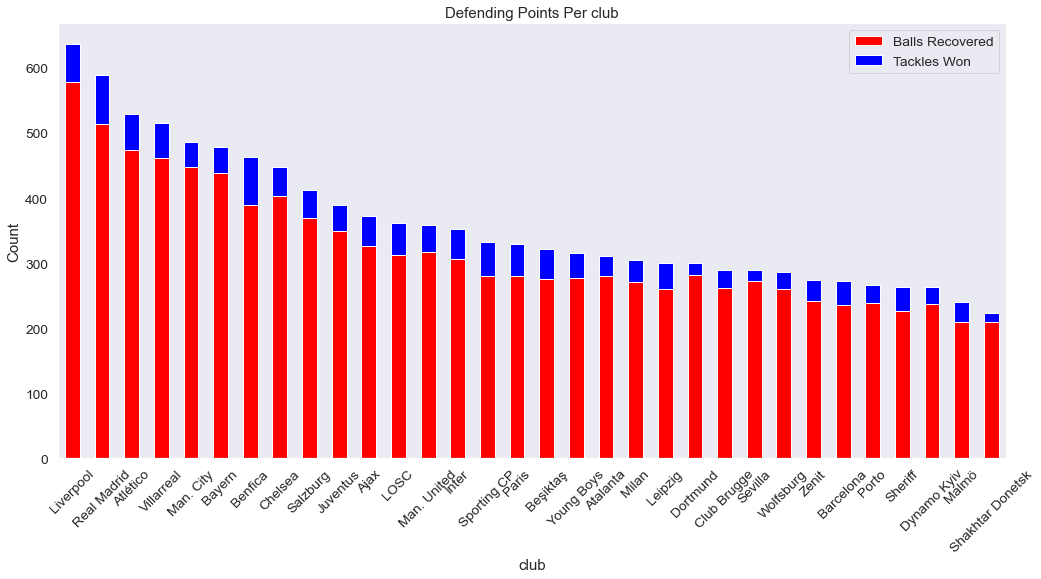

In [30]:
#Dropping the 'points' column to avoid plotting it
defending_clubs.drop(['points'],axis=1,inplace=True)

#Creating the Plot
fig, ax = plt.subplots(figsize=(17,8))
defending_clubs.plot(kind='bar',stacked=True, color=['red','blue'],ax=ax)

#Setting labels, xticks, title and label
ax.legend(['Balls Recovered', 'Tackles Won'])
plt.xticks(rotation=45)
plt.title('Defending Points Per club')
plt.ylabel('Count');

From the above plot, it is evident that liverpool had the best defence with regards to balls recovered and tackles won.

### Let's now look at players, 'Who was the best defender in the Champion's League?'

In [31]:
defending_players = defending_df.groupby(['player_name'])[['balls_recoverd','t_won']].sum().sort_values(by='balls_recoverd',ascending=False)
defending_players

,balls_recoverd,t_won
player_name,,
Casemiro,76,13
Éder Militão,76,6
Reinildo,76,6
Fabinho,74,9
Albiol,73,6
...,...,...
McAtee,1,1
Guindo,1,1
Knauff,1,2


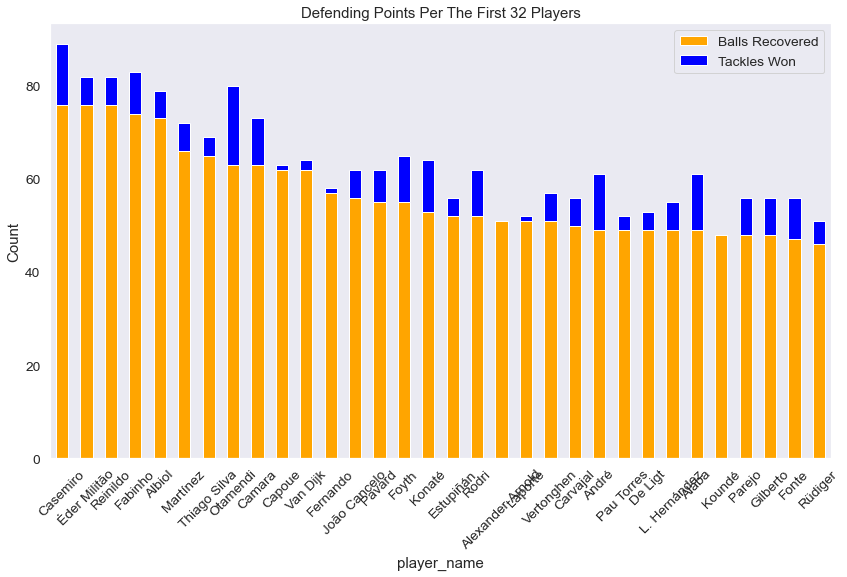

In [32]:
#Creating the Plot
fig, ax = plt.subplots(figsize=(14,8))
defending_players.head(32).plot(kind='bar',stacked=True,color=['orange','blue'],ax=ax)
#Setting the labels, and title
ax.legend(['Balls Recovered','Tackles Won'])
plt.title('Defending Points Per The First 32 Players')
plt.ylabel('Count')
plt.xticks(rotation=45);

From the above plot, we see that Casemiro(Real Madrid) was the best defending player followed by Fabinho(Liverpool)

### Let's now look at the Players Position work rate. What position was defending the hardest in the champion's League?

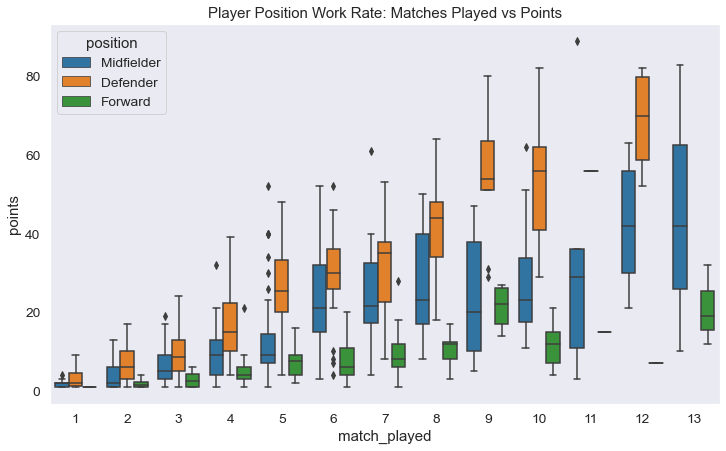

In [33]:
#Creating the plot
plt.figure(figsize=(12,7))
sns.boxplot(x='match_played',y='points',hue='position',data=defending_df)

#Setting the title
plt.title('Player Position Work Rate: Matches Played vs Points');

As expected, Defenders generally had the best work rate

# Disciplinary DataFrame

<img src='photos/Disciplinary2.jpg'>

In [35]:
disciplinary_df

,serial,player_name,club,position,fouls_committed,fouls_suffered,red,yellow,minutes_played,match_played
0,1,João Palhinha,Sporting CP,Midfielder,23,17,2,0,534,6
1,2,Capoue,Villarreal,Midfielder,19,17,3,1,1046,12
2,2,Rodri,Man. City,Midfielder,19,4,2,0,842,10
3,2,Seiwald,Salzburg,Midfielder,19,3,2,0,649,8
4,5,Balanta,Club Brugge,Midfielder,18,3,4,0,407,5
...,...,...,...,...,...,...,...,...,...,...
579,491,Eric Ramirez,Dynamo Kyiv,Forward,1,0,0,0,16,2
580,491,Bradarić,LOSC,Defender,1,0,0,0,13,1
581,491,Iborra,Villarreal,Midfielder,1,0,0,0,10,1
582,491,Zhegrova,LOSC,Midfielder,1,0,0,0,9,1


For this dataset we'll only focus on players and the fouls committed with cards given

### Inspecting the dataframe, missing data and info on the dataset

In [36]:
#Missing values
print("Sum of Null values\n")
print(defending_df.isna().sum())
print("\n")

#Info on Dataset
print("Info on Dataset\n")
print(defending_df.info())
print("\n")

#Duplicated values
print(f"Duplicated Elements: {defending_df.duplicated().sum()}")

Sum of Null values

serial                 0
player_name            0
club                   0
position               0
balls_recoverd         0
tackles                0
t_won                  0
t_lost                 0
clearance_attempted    0
match_played           0
points                 0
dtype: int64


Info on Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 627 entries, 0 to 626
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   serial               627 non-null    int64 
 1   player_name          627 non-null    object
 2   club                 627 non-null    object
 3   position             627 non-null    object
 4   balls_recoverd       627 non-null    int64 
 5   tackles              627 non-null    int64 
 6   t_won                627 non-null    int64 
 7   t_lost               627 non-null    int64 
 8   clearance_attempted  627 non-null    int64 
 9   match_played         627

Our dataframe looks good, Let's work on it!

We'll focus on the players

In [37]:
#Grouping players by fouls committed and cards
disciplinary_players = disciplinary_df.groupby(['player_name'])[['fouls_committed','red','yellow']].sum().sort_values(by='fouls_committed',ascending=False)#.style.background_gradient(cmap='Oranges')
#Having a look
disciplinary_players.head(10)

,fouls_committed,red,yellow
player_name,,,
João Palhinha,23,2,0
Capoue,19,3,1
Seiwald,19,2,0
Rodri,19,2,0
Camara,18,2,0
Balanta,18,4,0
Álvarez,17,4,0
Otamendi,17,2,0
Éder Militão,17,4,0


### Let's have a look at the most indiscipline players in the champions league

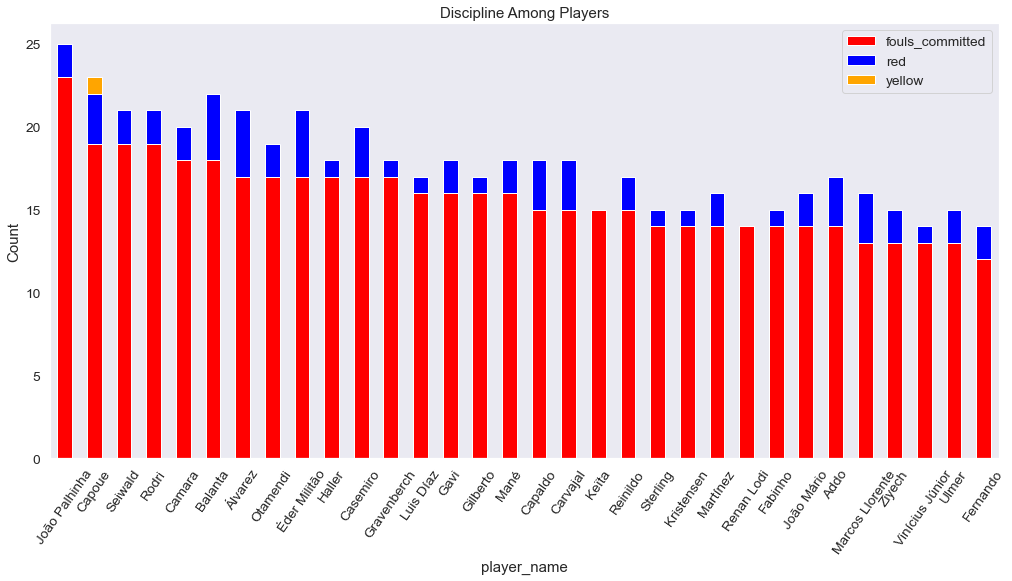

In [38]:
#Creating the plot
fig, ax = plt.subplots(figsize=(17,8))
disciplinary_players.head(32).plot(kind='bar',stacked=True,color=['red','blue','orange'],ax=ax)

#Setting title, label and xticks
plt.title("Discipline Among Players")
plt.ylabel('Count')
plt.xticks(rotation=55);

Joao Paulinha had the most fouls committed and would be considered the most indiscipline player in the Champions League 2022/23 Season.

### Let's have a look at the most disciplined players

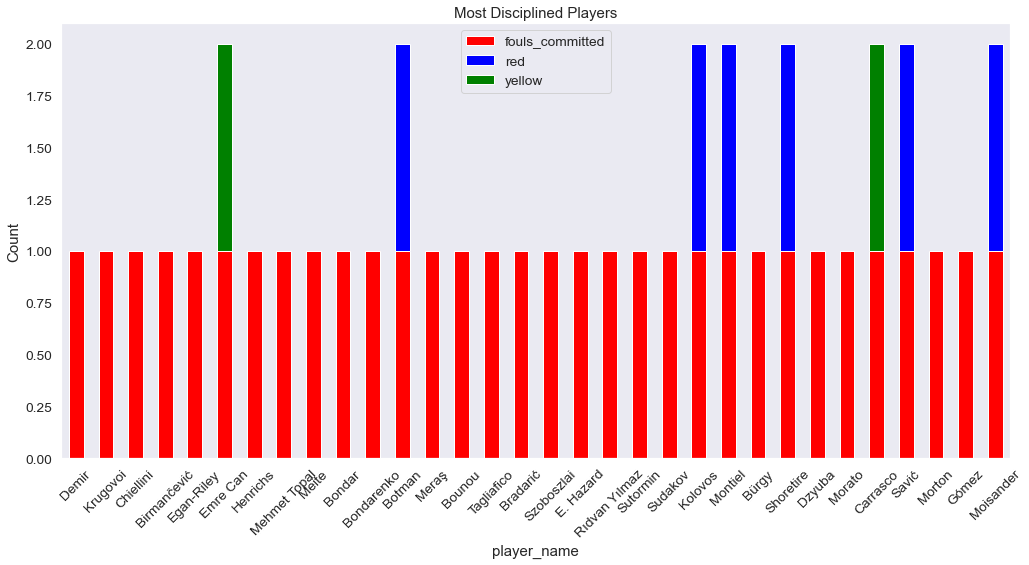

In [39]:
#Creating the plot
fig, ax = plt.subplots(figsize=(17,8))
disciplinary_players.tail(32).plot(kind='bar',stacked=True,color=['red','blue','green'],ax=ax)

#Setting the title, label and xticks
plt.title("Most Disciplined Players")
plt.ylabel("Count")
plt.xticks(rotation=45);

# Distribution DataFrame

<img src='photos/Distribution.jpg'>

In [41]:
#Having a look
distribution_df

,serial,player_name,club,position,pass_accuracy,pass_attempted,pass_completed,cross_accuracy,cross_attempted,cross_complted,freekicks_taken,match_played
0,1,Erokhin,Zenit,Midfielder,98.0,27,26,0,2,0,0,6
1,2,Eric García,Barcelona,Defender,97.5,203,197,0,0,0,1,4
2,3,Ulreich,Bayern,Goalkeeper,97.0,32,31,0,0,0,1,1
3,4,Rugani,Juventus,Defender,96.8,130,122,0,0,0,0,4
4,5,J. Timber,Ajax,Midfielder,95.8,497,474,0,1,0,14,8
...,...,...,...,...,...,...,...,...,...,...,...,...
603,604,Phillips,Liverpool,Defender,44.5,37,33,0,0,0,1,2
604,605,Philipp,Wolfsburg,Forward,44.0,9,7,0,0,0,1,2
605,606,Brobbey,Leipzig,Forward,42.6,23,13,0,2,0,0,5
606,607,Traoré,Shakhtar Donetsk,Forward,36.5,22,16,0,0,0,0,2


For this DataFrame, we'll focus on pass accuracy, pass completed, cross accuracy and cross completed. All these attributes will be narrowed down to players.

### Inspecting the DataFrame, missing values? Duplicated values?

In [42]:
#Missing values
print("Sum of Null values\n")
print(distribution_df.isna().sum())
print("\n")

#Info on Dataset
print("Info on Dataset\n")
print(distribution_df.info())
print("\n")

#Duplicated values
print(f"Duplicated Values: {distribution_df.duplicated().sum()}")

Sum of Null values

serial             0
player_name        0
club               0
position           0
pass_accuracy      0
pass_attempted     0
pass_completed     0
cross_accuracy     0
cross_attempted    0
cross_complted     0
freekicks_taken    0
match_played       0
dtype: int64


Info on Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   serial           608 non-null    int64  
 1   player_name      608 non-null    object 
 2   club             608 non-null    object 
 3   position         608 non-null    object 
 4   pass_accuracy    608 non-null    float64
 5   pass_attempted   608 non-null    int64  
 6   pass_completed   608 non-null    int64  
 7   cross_accuracy   608 non-null    int64  
 8   cross_attempted  608 non-null    int64  
 9   cross_complted   608 non-null    int64  
 10  freekicks_taken  608 non-null    i

Great! Our dataset is okay, let's dive in!

Taking a look at the players

In [43]:
#Grouping players with the relevant metrics
distribution_players = distribution_df.groupby(['player_name'])[['pass_accuracy','pass_completed','cross_accuracy','cross_complted']].sum().sort_values(by=['pass_accuracy','pass_completed'],ascending=False)#.style.background_gradient(cmap='Purples')
#Having a look
distribution_players

,pass_accuracy,pass_completed,cross_accuracy,cross_complted
player_name,,,,
Martínez,229.2,745,0,0
Sarr,180.2,130,25,1
Mendy,176.1,549,25,3
Camara,173.5,510,0,0
Onana,170.8,125,0,0
...,...,...,...,...
Phillips,44.5,33,0,0
Philipp,44.0,7,0,0
Brobbey,42.6,13,0,0


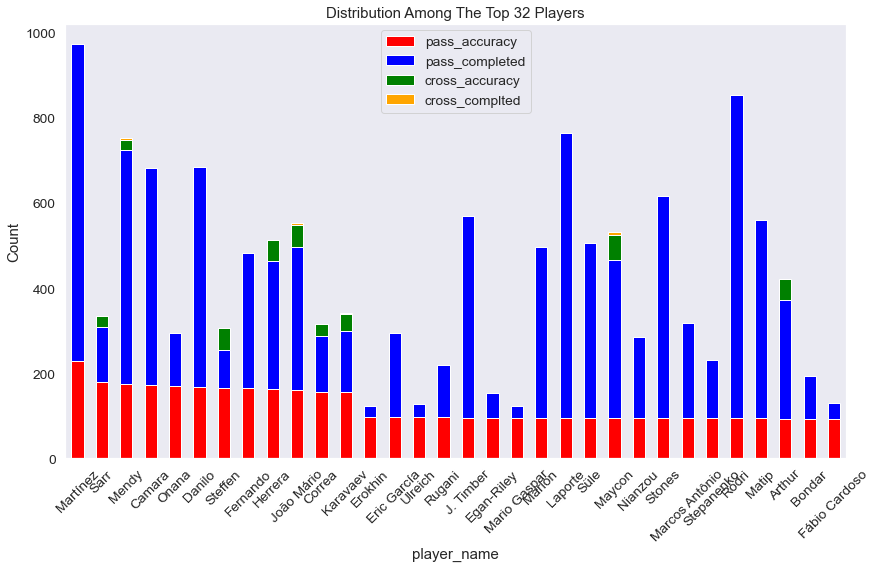

In [44]:
#Creating the plot
plt.figure(figsize=(14,8))
distribution_players.head(32).plot(kind='bar', stacked=True,color=['red','blue','green','orange'],ax=plt.gca())

#Setting title, label and xticks
plt.title('Distribution Among The Top 32 Players')
plt.ylabel('Count')
plt.xticks(rotation=45);

Names like 'Martinez' are shared so our plot above is not quite accurate, let's get accurate results below

In [45]:
#Player with highest pass accuracy
distribution_df[distribution_df['pass_accuracy']==distribution_df['pass_accuracy'].max()]

,serial,player_name,club,position,pass_accuracy,pass_attempted,pass_completed,cross_accuracy,cross_attempted,cross_complted,freekicks_taken,match_played
0,1,Erokhin,Zenit,Midfielder,98.0,27,26,0,2,0,0,6


Erokhin had the highest pass accuracy

In [46]:
#Player with most passes completed
distribution_df[distribution_df['pass_completed']==distribution_df['pass_completed'].max()]

,serial,player_name,club,position,pass_accuracy,pass_attempted,pass_completed,cross_accuracy,cross_attempted,cross_complted,freekicks_taken,match_played
15,16,Rodri,Man. City,Midfielder,94.2,806,760,0,1,0,13,10


Rodri had the most passes completed

In [92]:
#Player with highest cross accuracy
distribution_df[distribution_df['cross_accuracy']==distribution_df['cross_accuracy'].max()].style.background_gradient(cmap='winter')

,serial,player_name,club,position,pass_accuracy,pass_attempted,pass_completed,cross_accuracy,cross_attempted,cross_complted,freekicks_taken,match_played,points
32,32,Thiago Silva,Chelsea,Defender,93.100000,607,571,100,2,2,17,9,673
50,48,Simakan,Leipzig,Defender,92.000000,158,142,100,1,1,7,4,243
139,140,Mbemba,Porto,Defender,88.200000,215,192,100,2,2,10,5,294
156,157,De Ligt,Juventus,Defender,87.600000,346,307,100,1,1,8,7,408
176,172,Zagadou,Dortmund,Defender,87.000000,111,103,100,1,1,0,2,204
184,181,Ibrahimović,Milan,Forward,86.800000,49,40,100,1,1,2,4,141
244,242,Kessié,Milan,Midfielder,85.000000,175,150,100,4,4,10,5,254
279,280,Vanaken,Club Brugge,Midfielder,83.800000,288,241,100,1,1,7,6,342
291,291,Schulz,Dortmund,Defender,83.500000,129,110,100,3,3,1,4,213
308,306,Djimsiti,Atalanta,Defender,83.000000,191,160,100,1,1,6,5,261


A lot of players had the highest cross accuracy

Let's now focus on Player Positions work rate. For this we'll combine points for pass completed, cross accuracy and cross completed and append this to a new column.

In [48]:
#Creating a new column 
distribution_df['points'] = distribution_df['pass_completed'] + distribution_df['cross_accuracy'] + distribution_df['cross_complted']
#Having a look
distribution_df

,serial,player_name,club,position,pass_accuracy,pass_attempted,pass_completed,cross_accuracy,cross_attempted,cross_complted,freekicks_taken,match_played,points
0,1,Erokhin,Zenit,Midfielder,98.0,27,26,0,2,0,0,6,26
1,2,Eric García,Barcelona,Defender,97.5,203,197,0,0,0,1,4,197
2,3,Ulreich,Bayern,Goalkeeper,97.0,32,31,0,0,0,1,1,31
3,4,Rugani,Juventus,Defender,96.8,130,122,0,0,0,0,4,122
4,5,J. Timber,Ajax,Midfielder,95.8,497,474,0,1,0,14,8,474
...,...,...,...,...,...,...,...,...,...,...,...,...,...
603,604,Phillips,Liverpool,Defender,44.5,37,33,0,0,0,1,2,33
604,605,Philipp,Wolfsburg,Forward,44.0,9,7,0,0,0,1,2,7
605,606,Brobbey,Leipzig,Forward,42.6,23,13,0,2,0,0,5,13
606,607,Traoré,Shakhtar Donetsk,Forward,36.5,22,16,0,0,0,0,2,16


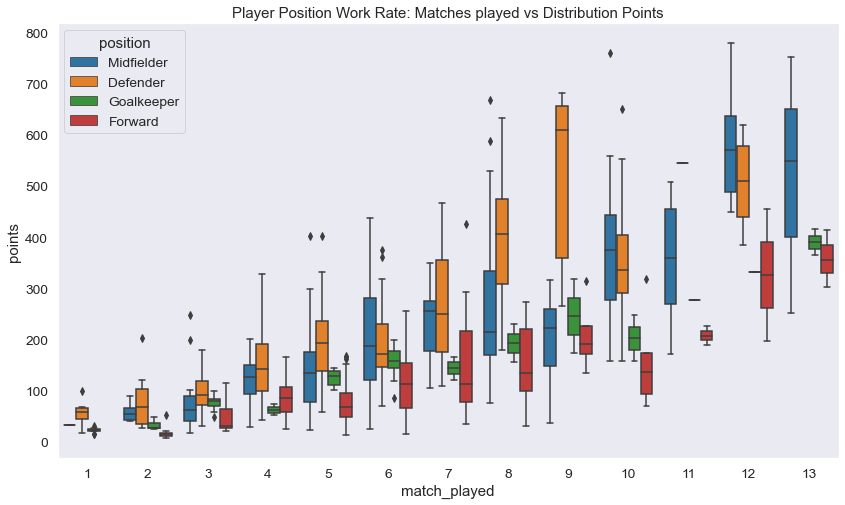

In [49]:
#Creating the plot
plt.figure(figsize=(14,8))
sns.boxplot(x='match_played', y='points', hue='position',data=distribution_df)

#Setting the title
plt.title('Player Position Work Rate: Matches played vs Distribution Points');

From our boxplot above, it is quite evident that defenders had the highest work rate having scooped more points in fewer matches

Let's now take a look at clubs

In [93]:
#Grouping clubs with relevant metrics
distribution_clubs = distribution_df.groupby(['club'],as_index=False)['points'].sum().sort_values(by='points',ascending=False)
#Converting to Dataframe
distribution_clubs = pd.DataFrame(distribution_clubs)
#Taking a look
distribution_clubs.style.background_gradient(cmap='winter')

,club,points
15,Liverpool,7474
17,Man. City,7110
22,Real Madrid,6907
7,Chelsea,6457
4,Bayern,5812
20,Paris,4336
28,Villarreal,4326
0,Ajax,4300
12,Juventus,4001
18,Man. United,3873


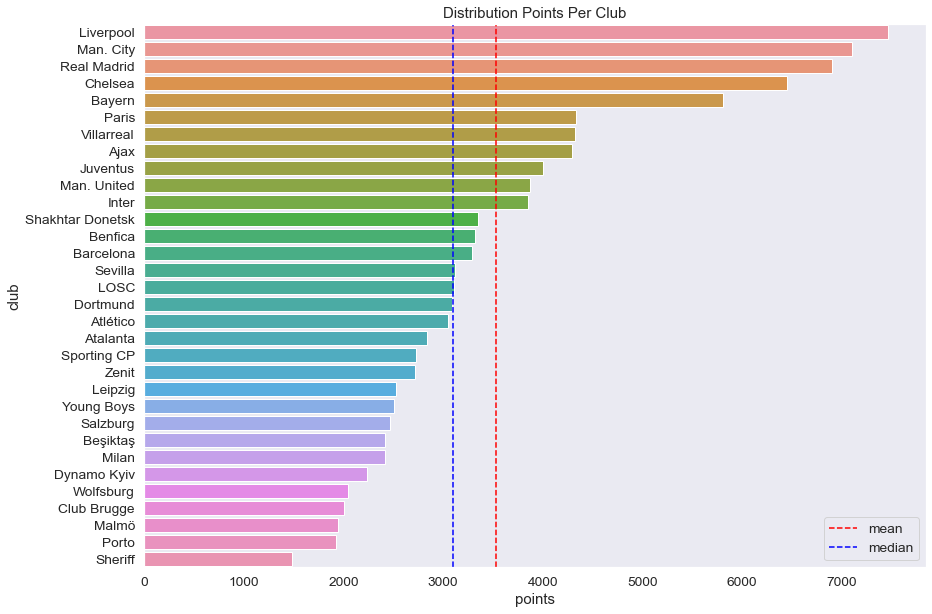

In [51]:
#Creating the plot
plt.figure(figsize=(14,10))
sns.barplot(data=distribution_clubs, y='club',x='points')

#Displaying Mean and Median
mean3 = int(np.mean(distribution_clubs['points']))
median3 = int(np.median(distribution_clubs['points']))
plt.axvline(x=mean3, color='red', ls='--', label='mean')
plt.axvline(x=median3, color='blue', ls='--', label='median')

#Setting the title
plt.title('Distribution Points Per Club')
plt.legend();

From our above plot, it is evident that Liverpool had the highest distribution points

Let's now distribute each teams and see how they performed

In [94]:
#Grouping clubs with relevant features
df_clubs = distribution_df.groupby(['club'])[['points','pass_accuracy','pass_completed','cross_accuracy','cross_complted']].sum().sort_values(by='points',ascending=False)
#Taking a look
df_clubs.style.background_gradient(cmap='winter')

,points,pass_accuracy,pass_completed,cross_accuracy,cross_complted
club,,,,,
Liverpool,7474,2047.900000,7103,302,69
Man. City,7110,1783.600000,6781,276,53
Real Madrid,6907,1545.100000,6513,348,46
Chelsea,6457,2059.800000,5694,695,68
Bayern,5812,1663.100000,5451,303,58
Paris,4336,1549.100000,4137,185,14
Villarreal,4326,1576.600000,3909,378,39
Ajax,4300,1367.300000,3941,305,54
Juventus,4001,1694.900000,3616,353,32


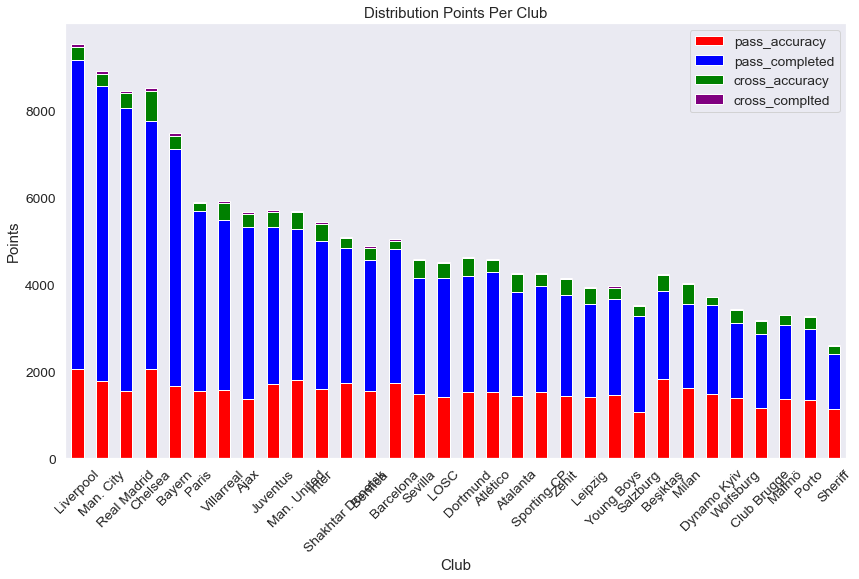

In [53]:
#Dropping the 'points' column to avoid plotting it
df_clubs.drop(['points'],axis=1,inplace=True)

#Creating the plot
plt.figure(figsize=(14,8))
df_clubs.plot(kind='bar',stacked=True, color=['red','blue','green','purple'],ax=plt.gca())

#Setting xticks, labels and title
plt.xticks(rotation=45)
plt.ylabel('Points')
plt.xlabel('Club')
plt.title('Distribution Points Per Club');

Liverpool was all round the best

# GoalKeeping DataFrame

<img src='photos/goalkeeping3.jpg'>

In [55]:
#Taking a look
goalkeeping_df

,serial,player_name,club,position,saved,conceded,saved_penalties,cleansheets,punches made,match_played
0,1,Courtois,Real Madrid,Goalkeeper,61,14,1,5,4,13
1,2,Rulli,Villarreal,Goalkeeper,41,16,0,3,12,12
2,3,Vlachodimos,Benfica,Goalkeeper,38,17,1,5,5,10
3,4,Athanasiadis,Sheriff,Goalkeeper,29,8,0,1,2,5
4,5,Mignolet,Club Brugge,Goalkeeper,28,20,0,0,1,6
5,6,Oblak,Atlético,Goalkeeper,26,10,0,3,2,10
6,7,Musso,Atalanta,Goalkeeper,21,13,0,1,1,6
7,8,Ersin Destanoğlu,Beşiktaş,Goalkeeper,20,17,0,0,0,5
8,9,De Gea,Man. United,Goalkeeper,19,9,0,1,0,7
9,9,Dahlin,Malmö,Goalkeeper,19,8,1,0,3,4


Just by having a look at the Dataframe, we can already see the best goalkeeper in the champions league and the team he plays for. Courtois had the most saves and clean sheets making him the best goalkeeper in the Champions League 2021/22 season. Not surprising as Real Madrid was also among the top defending clubs from our previous analysis above

### Inspecting the Dataframe

In [56]:
#Missing values
print("Sum of Missing values\n")
print(goalkeeping_df.isna().sum())
print("\n")

#Info on Dataset
print("Info on Dataset\n")
print(goalkeeping_df.info())
print("\n")

#Duplicated values
print(f"Duplicated Elements: {goalkeeping_df.duplicated().sum()}")

Sum of Missing values

serial             0
player_name        0
club               0
position           0
saved              0
conceded           0
saved_penalties    0
cleansheets        0
punches made       0
match_played       0
dtype: int64


Info on Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   serial           53 non-null     int64 
 1   player_name      53 non-null     object
 2   club             53 non-null     object
 3   position         53 non-null     object
 4   saved            53 non-null     int64 
 5   conceded         53 non-null     int64 
 6   saved_penalties  53 non-null     int64 
 7   cleansheets      53 non-null     int64 
 8   punches made     53 non-null     int64 
 9   match_played     53 non-null     int64 
dtypes: int64(7), object(3)
memory usage: 4.3+ KB
None


Duplicated Elements: 0


Our dataframe has no issues, let's now work on it

Since our dataframe has already shown us what we need to know, we'll focus on the distribution of different features in the dataframe

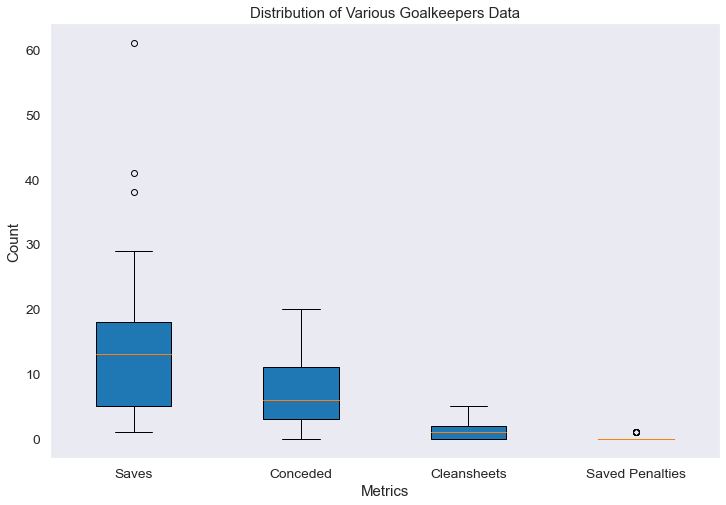

In [57]:
#Creating the plot
fig, ax = plt.subplots(figsize=(12,8))
data_to_plot = [goalkeeping_df['saved'],goalkeeping_df['conceded'],goalkeeping_df['cleansheets'],goalkeeping_df['saved_penalties']]
labels = ['Saves', 'Conceded', 'Cleansheets','Saved Penalties']
ax.boxplot(data_to_plot,labels=labels, patch_artist=True)

#Setting the title and labels
plt.title('Distribution of Various Goalkeepers Data')
plt.xlabel('Metrics')
plt.ylabel('Count');

# Goals Dataframe

<img src='photos/goals1.jpeg'>

In [59]:
#Taking a look
goals_df

,serial,player_name,club,position,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played
0,1,Benzema,Real Madrid,Forward,15,11,1,3,0,13,2,3,12
1,2,Lewandowski,Bayern,Forward,13,8,3,1,1,13,0,3,10
2,3,Haller,Ajax,Forward,11,3,4,3,1,11,0,1,8
3,4,Salah,Liverpool,Forward,8,0,8,0,0,7,1,1,13
4,5,Nkunku,Leipzig,Midfielder,7,3,1,3,0,7,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,73,Yansané,Sheriff,Forward,1,0,0,1,0,1,0,0,3
179,73,Yakhshiboev,Sheriff,Forward,1,0,0,1,0,1,0,0,3
180,73,Messias Junior,Milan,Forward,1,0,0,1,0,1,0,0,2
181,73,Morato,Benfica,Defender,1,0,0,1,0,1,0,0,2


It's quite clear that Karim Benzema was the highest scoring player in the Champions League

### Inspecting the Dataframe

In [60]:
#Missing Values
print("Sum of Null values\n")
print(goals_df.isna().sum())
print("\n")

#Info on Dataset
print("Info on Dataset\n")
print(goals_df.info())
print("\n")

#Duplicated values
print(f"Duplicated Elements: {goals_df.duplicated().sum()}")

Sum of Null values

serial           0
player_name      0
club             0
position         0
goals            0
right_foot       0
left_foot        0
headers          0
others           0
inside_area      0
outside_areas    0
penalties        0
match_played     0
dtype: int64


Info on Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   serial         183 non-null    int64 
 1   player_name    183 non-null    object
 2   club           183 non-null    object
 3   position       183 non-null    object
 4   goals          183 non-null    int64 
 5   right_foot     183 non-null    int64 
 6   left_foot      183 non-null    int64 
 7   headers        183 non-null    int64 
 8   others         183 non-null    int64 
 9   inside_area    183 non-null    int64 
 10  outside_areas  183 non-null    int64 
 11  penalties      183 non-null    i

### Who had the best Goal to Match Ratio? Let's take a look

We'll start by creating a new column that contains the ratios

In [61]:
#Creating the column
goals_df['go/ma'] = goals_df['goals'] / goals_df['match_played']
#Rounding to two float points
goals_df['go/ma'] = goals_df['go/ma'].map(lambda x: "%.2f"%x)
#Taking a look
goals_df

,serial,player_name,club,position,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played,go/ma
0,1,Benzema,Real Madrid,Forward,15,11,1,3,0,13,2,3,12,1.25
1,2,Lewandowski,Bayern,Forward,13,8,3,1,1,13,0,3,10,1.30
2,3,Haller,Ajax,Forward,11,3,4,3,1,11,0,1,8,1.38
3,4,Salah,Liverpool,Forward,8,0,8,0,0,7,1,1,13,0.62
4,5,Nkunku,Leipzig,Midfielder,7,3,1,3,0,7,0,0,6,1.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,73,Yansané,Sheriff,Forward,1,0,0,1,0,1,0,0,3,0.33
179,73,Yakhshiboev,Sheriff,Forward,1,0,0,1,0,1,0,0,3,0.33
180,73,Messias Junior,Milan,Forward,1,0,0,1,0,1,0,0,2,0.50
181,73,Morato,Benfica,Defender,1,0,0,1,0,1,0,0,2,0.50


Now after creating the column, let's find the player with the highest goal to match ratio.

In [62]:
goals_df[goals_df['go/ma']==goals_df['go/ma'].max()]

,serial,player_name,club,position,goals,right_foot,left_foot,headers,others,inside_area,outside_areas,penalties,match_played,go/ma
2,3,Haller,Ajax,Forward,11,3,4,3,1,11,0,1,8,1.38


Holler had the highest goal to match ratio by scoring 11 goals in only 8 matches.

### Player Positions. How much did each position contribute to goals?

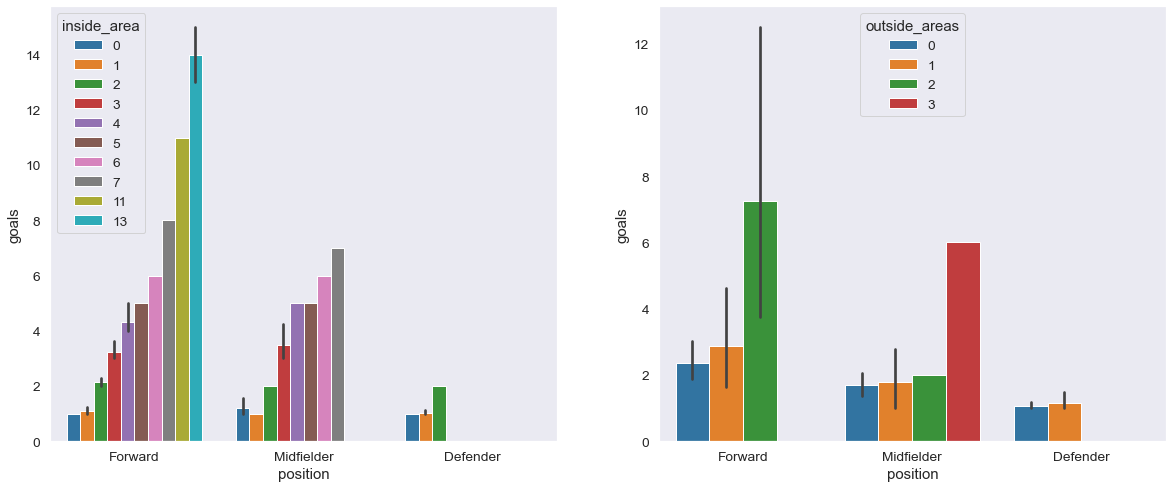

In [63]:
#Creating the plot
fig, axes = plt.subplots(1,2, figsize=(20,8))
sns.barplot(x='position',y='goals',hue='inside_area',data=goals_df,ax=axes[0])
sns.barplot(x='position',y='goals',hue='outside_areas',data=goals_df,ax=axes[1]);

From the plot above we see forwards had the most contribution as expected

### Where were most goals scored? Let's take a look

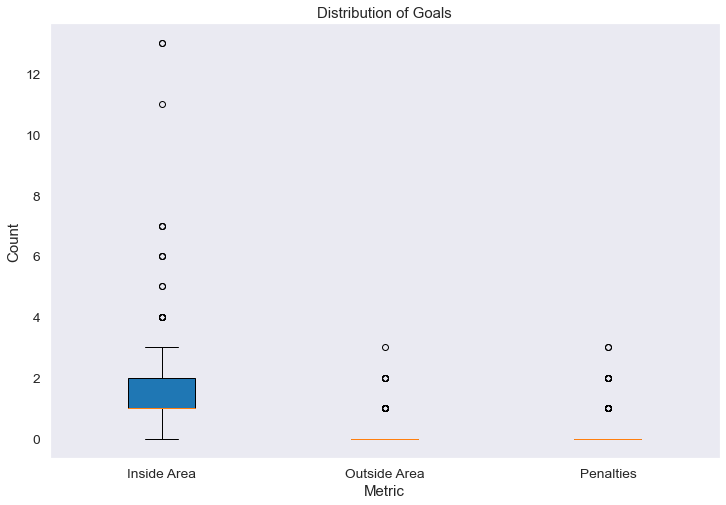

In [64]:
#Plotting Data
to_plot = [goals_df['inside_area'],goals_df['outside_areas'],goals_df['penalties']]
labels = ['Inside Area','Outside Area','Penalties']

#Creating the plot
fig, ax = plt.subplots(figsize=(12,8))
ax.boxplot(to_plot,labels=labels, patch_artist=True)

#Setting labels and title
plt.xlabel('Metric')
plt.ylabel('Count')
plt.title('Distribution of Goals');

Most goals were scored in the inside area

### Goals per club. What club had the most goals

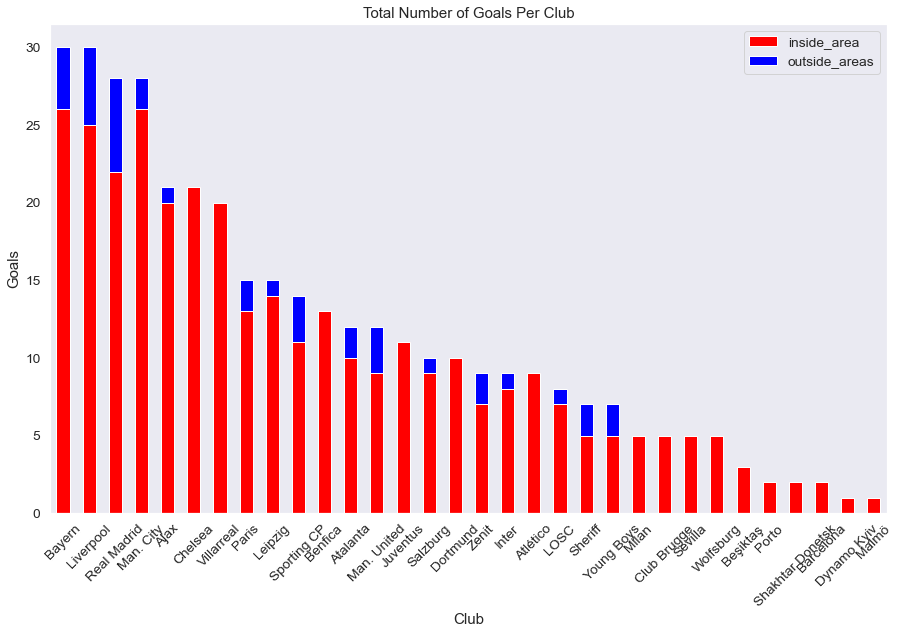

In [65]:
#Creating the Dataframe
goals_clubs = goals_df.groupby(['club'])[['inside_area','outside_areas','goals']].sum().sort_values(by='goals',ascending=False)
goals_clubs.drop(['goals'],axis=1,inplace=True)

#Creating the plot
plt.figure(figsize=(15,9))
goals_clubs.plot(kind='bar',stacked=True,color=['red','blue'],ax=plt.gca())

#Setting labels, title and xticks
plt.title("Total Number of Goals Per Club")
plt.ylabel("Goals")
plt.xlabel("Club")
plt.xticks(rotation=45);

Bayern and Liverpool shared the same number of goals

# Stats Dataframe

In [66]:
#Having a look
stats_df

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered
0,Courtois,Real Madrid,Goalkeeper,1230,13,0,0,64.2
1,Vinícius Júnior,Real Madrid,Forward,1199,13,4,6,133.0
2,Benzema,Real Madrid,Forward,1106,12,15,1,121.5
3,Modrić,Real Madrid,Midfielder,1077,13,0,4,124.5
4,Éder Militão,Real Madrid,Defender,1076,12,0,0,110.4
...,...,...,...,...,...,...,...,...
742,Gil Dias,Benfica,Midfielder,1,1,0,0,0.7
743,Rodrigo Ribeiro,Sporting CP,Forward,1,1,0,0,0.7
744,Cojocari,Sheriff,Defender,1,1,0,0,0.5
745,Maouassa,Club Brugge,Defender,1,1,0,0,0.2


### Inspecting the Dataframe

In [67]:
#Missing values
print("Sum of Null values\n")
print(stats_df.isna().sum())
print("\n")

#Info on Dataset
print("Info on Dataset\n")
print(stats_df.info())
print("\n")

#Duplicated Elements
print(f"Duplicated Elements: {stats_df.duplicated().sum()}")

Sum of Null values

player_name         0
club                0
position            0
minutes_played      0
match_played        0
goals               0
assists             0
distance_covered    0
dtype: int64


Info on Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747 entries, 0 to 746
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   player_name       747 non-null    object
 1   club              747 non-null    object
 2   position          747 non-null    object
 3   minutes_played    747 non-null    int64 
 4   match_played      747 non-null    int64 
 5   goals             747 non-null    int64 
 6   assists           747 non-null    int64 
 7   distance_covered  747 non-null    object
dtypes: int64(4), object(4)
memory usage: 46.8+ KB
None


Duplicated Elements: 0


We can see that our Dataset has no issues, but our distance covered is in object('string') format but we need it integer so we'll convert it

In [68]:
#We had hidden null rows in the distance column
stats_df[stats_df['distance_covered']=='-']

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered
725,Sulejmani,Young Boys,Midfielder,7,1,0,0,-
746,Zesiger,Young Boys,Defender,1,1,0,0,-


In [69]:
#Dropping them
to_drop = stats_df[stats_df['distance_covered']=='-'].index
stats_df.drop(to_drop, axis=0, inplace=True)

In [70]:
#Converting the column to type integer
stats_df['distance_covered'] = stats_df['distance_covered'].astype(float)

### Let's look at Player Position work rate, What players covered the most distance in the minutes they played

In [95]:
#Grouping positions with relevant features
stats_positions = stats_df.groupby(['position'],as_index=False)[['minutes_played','distance_covered']].sum()
#Having a look
stats_positions.style.background_gradient(cmap='copper')

,position,minutes_played,distance_covered
0,Defender,89507,10301.500000
1,Forward,45451,5451.100000
2,Goalkeeper,22620,1306.300000
3,Midfielder,90128,11451.100000


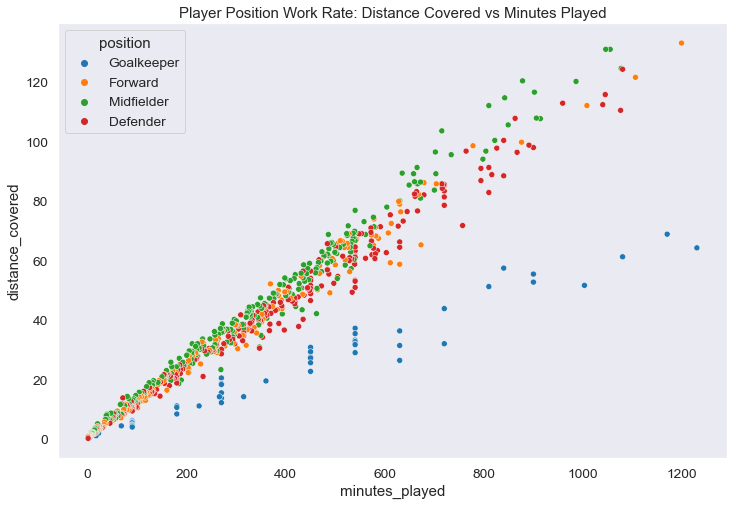

In [72]:
#Creating the plot
plt.figure(figsize=(12,8))
sns.scatterplot(x='minutes_played', y='distance_covered', hue='position',data=stats_df)

#Setting the title
plt.title('Player Position Work Rate: Distance Covered vs Minutes Played');

From our Scatter Plot above, we see midfielders had the highest work rate in the Champions League

### Player with the highest work rate

In [73]:
#Creating the new column
stats_df['di/ma'] = stats_df['minutes_played'] / stats_df['distance_covered']

#Rounding off values to two float points
stats_df['di/ma'] = stats_df['di/ma'].map(lambda x: "%.2f"%x)

#Printing the row
stats_df[stats_df['di/ma']==stats_df['di/ma'].max()]

,player_name,club,position,minutes_played,match_played,goals,assists,distance_covered,di/ma
276,Fred,Man. United,Midfielder,433,6,0,0,43.4,9.98


Fred was the player with the highest work rate

# Conclusions for UEFA Champions League 2021/22

**- `Liverpool` was basically the best team since it has had the highest points in each analysis.**

**-`Vinicius Junior` was the best Attacker.**

**-`Karim Benzema` had the most attempts both on,off target and blocked. He also had the most goals.**

**-`Casemiro` was the best defender having the most balls recovered and tackles won.**

**-`Joao Paulinha` was the most indiscipline player having the most fouls committed.**

**-`Rodri` had the most passes completed.**

**-`Erokhin` from Club:Zenit had the highest Pass Accuracy.**

**-`Thibaut Courtois` was the best goalkeeper having the most saves and most cleansheets.**

**-`Fred` had the highest work rate by Minutes played against distance covered.**

**Although `Liverpool` was the best team `on paper`, unfortunately they did not win.**

**The Winners were:**

<img src='photos/winners2.jpeg'>

**`Real Madrid`**

# Enriching The DataSet

### After Such a long Analysis, Let's enrich our dataset by looking at UEFA Quarter Finals since 1980

In [75]:
#Loading the csv
ucl_1980 = pd.read_csv('UCLQuarterFinals.csv')
ucl_1980

,year,code,name,round,league,region,decade,superliga,city,areacode,metropol,pop,gdp,country,eurostat,ecb,cowc,cown
0,1981,LIV,Liverpool FC,W,England,Big 5,1980s,Yes,Liverpool,UK006,Liverpool,1533860.0,50484.0,United Kingdom,UK,GB,UKG,200.0
1,1981,MAD,Real Madrid CF,RU,Spain,Big 5,1980s,Yes,Madrid,ES001,Madrid,6791667.0,342534.0,Spain,ES,ES,SPN,230.0
2,1981,BMN,FC Bayern,SF,Germany,Big 5,1980s,No,München,DE003,Munich,2883373.0,241407.0,Germany,DE,DE,GMY,255.0
3,1981,INT,FC Inter Milan,SF,Italy,Big 5,1980s,Yes,Milano,IT002,Milan,5145657.0,301366.0,Italy,IT,IT,ITA,325.0
4,1981,BEL,Red Star,QF,Serbia,East,1980s,No,Belgrade,Belgrade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,2021,PSG,Paris SG,SF,France,Big 5,2010s,No,Paris,FR001,Paris,12914803.0,913737.0,France,FR,FR,FRN,220.0
324,2021,LIV,Liverpool FC,QF,England,Big 5,2010s,Yes,Liverpool,UK006,Liverpool,1533860.0,50484.0,United Kingdom,UK,GB,UKG,200.0
325,2021,BMN,FC Bayern,QF,Germany,Big 5,2010s,No,München,DE003,Munich,2883373.0,241407.0,Germany,DE,DE,GMY,255.0
326,2021,POR,FC Porto,QF,Portugal,Small,2010s,No,Porto,PT002,Porto,1272189.0,38974.0,Portugal,PT,PT,POR,235.0


### Inspecting Dataframe

In [76]:
#Missing Data
print("Sum of Null values\n")
print(ucl_1980.isna().sum())
print("\n")

#Info on Dataset
print("Info on Dataset\n")
print(ucl_1980.info())
print("\n")

#Duplicated Elements
print(f"Duplicated Elements: {ucl_1980.duplicated().sum()}")

Sum of Null values

year          0
code          0
name          0
round         0
league        0
region        0
decade        0
superliga     0
city          0
areacode      0
metropol     34
pop          34
gdp          39
country       9
eurostat      9
ecb           9
cowc          9
cown          9
dtype: int64


Info on Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       328 non-null    int64  
 1   code       328 non-null    object 
 2   name       328 non-null    object 
 3   round      328 non-null    object 
 4   league     328 non-null    object 
 5   region     328 non-null    object 
 6   decade     328 non-null    object 
 7   superliga  328 non-null    object 
 8   city       328 non-null    object 
 9   areacode   328 non-null    object 
 10  metropol   294 non-null    object 
 11  pop        294 non-null    flo

We see that we have some columns that contain missing data, we'll drop some of them and some we'll fill the null values

In [77]:
#Dropping the null value columns
ucl_1980.drop(['metropol','ecb','cowc'],axis=1,inplace=True)

#Filling null values
ucl_1980['pop'].fillna(ucl_1980['pop'].mean(),inplace=True)
ucl_1980['gdp'].fillna(ucl_1980['gdp'].mean(),inplace=True)
ucl_1980['cown'].fillna(ucl_1980['cown'].mean(),inplace=True)
ucl_1980['country'].fillna('None',inplace=True)
ucl_1980['eurostat'].fillna('None',inplace=True)

In [78]:
#Confirming no null values
ucl_1980.isna().sum()

year         0
code         0
name         0
round        0
league       0
region       0
decade       0
superliga    0
city         0
areacode     0
pop          0
gdp          0
country      0
eurostat     0
cown         0
dtype: int64

Great! Now we have no null values. Let's work on the dataframe

In [79]:
#Separating the dataset into 3 categories[winners, semifinalists and quarterfinalists]
winners = ucl_1980[ucl_1980['round']=='W']
semis = ucl_1980[ucl_1980['round']=='SF']
quarters = ucl_1980[ucl_1980['round']=='QF']

### Since Real Madrid was our 2021/22 winner, have they been winning a lot over the years?

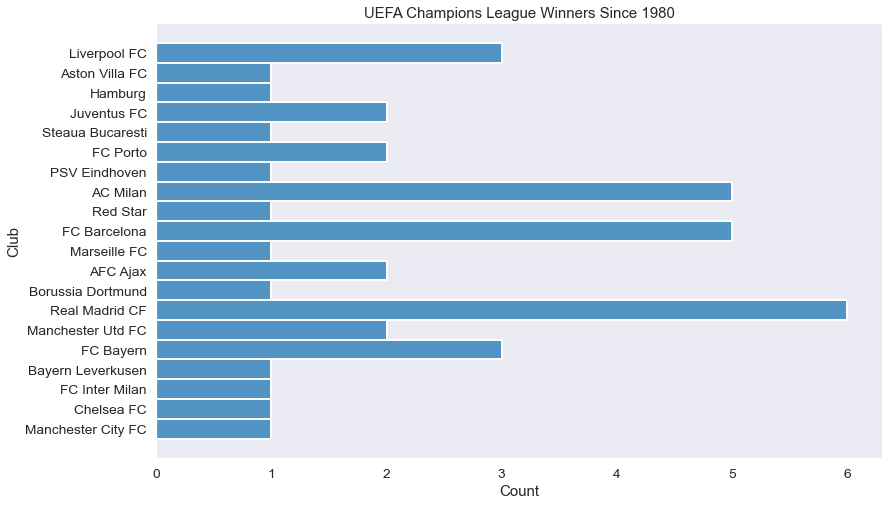

In [80]:
#Creating the plot
plt.figure(figsize=(13,8))
sns.histplot(y='name',data=winners)

#Setting title and label
plt.title('UEFA Champions League Winners Since 1980')
plt.ylabel('Club');

Seems like Real Madrid is the Champions League Favourites

### Let's explore another feature(Population) of the country the club is from and see if it has any effect on a club winning

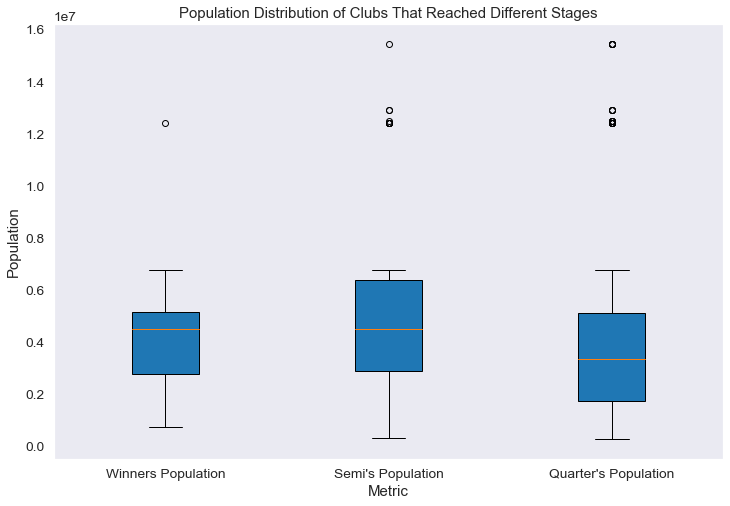

In [81]:
#Data to plot
pop_plot = [winners['pop'], semis['pop'], quarters['pop']]
labels = ["Winners Population", "Semi's Population", "Quarter's Population"]

#Creating the plot
fig, ax = plt.subplots(figsize=(12,8))
ax.boxplot(pop_plot, labels=labels,patch_artist=True);

#Setting the labels and title
plt.xlabel('Metric')
plt.ylabel('Population')
plt.title('Population Distribution of Clubs That Reached Different Stages');

### What League has produced the most winners?

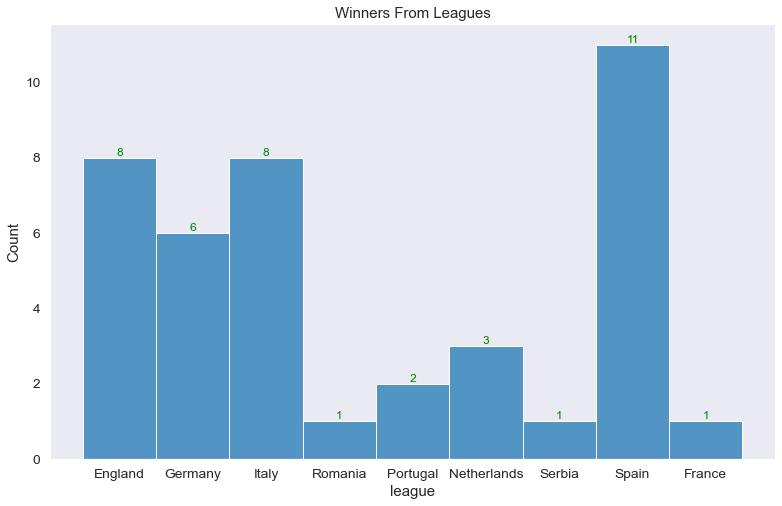

In [82]:
#Creating the plot
plt.figure(figsize=(13,8))
sns.histplot(x='league', data=winners)

#Setting the title
plt.title('Winners From Leagues')

#Storing our figure in an axis
ax=plt.gca()

#Looping through each element in our axis and editing it to fill in the values
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2, p.get_height(), int(p.get_height()), fontsize=12,color='green',ha='center',va='bottom')

### What league has generally reached the quarter finals or above

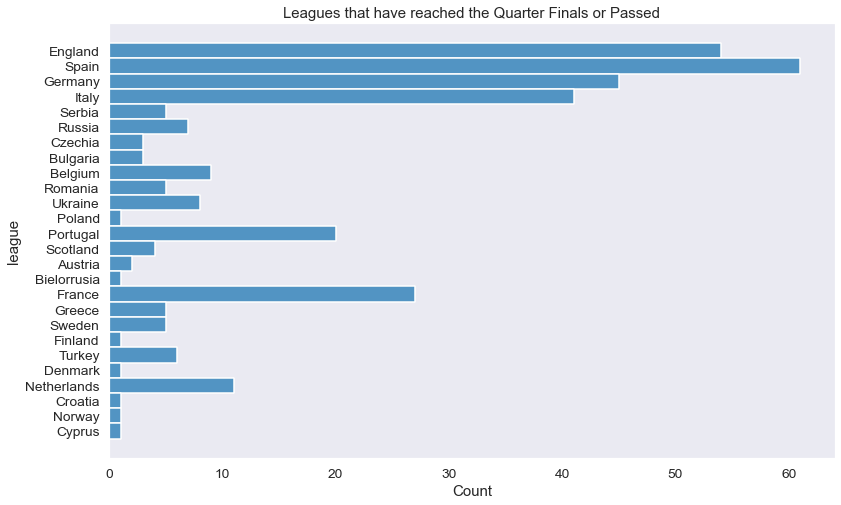

In [83]:
#Creating the plot
plt.figure(figsize=(13,8))
sns.histplot(y='league',data=ucl_1980)

#Setting the title
plt.title('Leagues that have reached the Quarter Finals or Passed');

### Since 1980, when did Real Madrid start winning the Champions League? Did they start a long time ago or are they a part of the new generation?

In [84]:
winners[winners['name']=='Real Madrid CF'].style.background_gradient(cmap='Reds')

,year,code,name,round,league,region,decade,superliga,city,areacode,pop,gdp,country,eurostat,cown
136,1998,RMA,Real Madrid CF,W,Spain,Big 5,1990s,Yes,Madrid,ES001,6791667.000000,342534.000000,Spain,ES,230.000000
152,2000,RMA,Real Madrid CF,W,Spain,Big 5,2000s,Yes,Madrid,ES001,6791667.000000,342534.000000,Spain,ES,230.000000
264,2014,RMA,Real Madrid CF,W,Spain,Big 5,2010s,Yes,Madrid,ES001,6791667.000000,342534.000000,Spain,ES,230.000000
280,2016,RMA,Real Madrid CF,W,Spain,Big 5,2010s,Yes,Madrid,ES001,6791667.000000,342534.000000,Spain,ES,230.000000
288,2017,RMA,Real Madrid CF,W,Spain,Big 5,2010s,Yes,Madrid,ES001,6791667.000000,342534.000000,Spain,ES,230.000000
296,2018,RMA,Real Madrid CF,W,Spain,Big 5,2010s,Yes,Madrid,ES001,6791667.000000,342534.000000,Spain,ES,230.000000


We see that Real Madrid has had a successful run since 2014. What could be the reason? New Coach? New Players? Probably

# Conclusions for this Dataset

**-`Real Madrid` has won the most Champions League titles since 1980**

**-`Spain` has produced the most winners in the Champions League**

**-`Population` does not affect a Country's/ Team's ability to win the Champions League**

# Overall Conclusion

**-`Real Madrid` is the Champions League Favourites having won the most titles**

**-`Liverpool` is an overall good team having performed exceptionally in the 2021/22 season and bagged a few titles since 1980**

**-`Spain` and `England` have produced the highest performing teams and it is very likely they will continue to do so**

# Thanks Note

<img src='photos/thumbs2.jpg'>

**Thankyou for your time, it was a long journey and we've come to the end of it. Hope you learnt something about the Champions League and enjoyed the process.**